#  Sales Forecasting

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Load the datasets

In [2]:
stores = pd.read_csv(r"C:\Users\Selvam\OneDrive\Desktop\project\Sales_Forecasting\Sales Forecasting\stores.csv")
features = pd.read_csv(r"C:\Users\Selvam\OneDrive\Desktop\project\Sales_Forecasting\Sales Forecasting\features.csv")
train = pd.read_csv(r"C:\Users\Selvam\OneDrive\Desktop\project\Sales_Forecasting\Sales Forecasting\train.csv")

## Display the first few rows of each dataset

In [3]:
print(stores.head())
print(features.head())
print(train.head())


   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [4]:
# Merge datasets on 'Store' and 'Date'
data = train.merge(stores, on='Store')
data = data.merge(features, on=['Store', 'Date', 'IsHoliday'])

In [5]:
# Display the first few rows of the merged dataset
print(data.head())


   Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1  2010-02-05      24924.50      False    A  151315        42.31   
1      1     2  2010-02-05      50605.27      False    A  151315        42.31   
2      1     3  2010-02-05      13740.12      False    A  151315        42.31   
3      1     4  2010-02-05      39954.04      False    A  151315        42.31   
4      1     5  2010-02-05      32229.38      False    A  151315        42.31   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.572        NaN        NaN        NaN        NaN        NaN   
2       2.572        NaN        NaN        NaN        NaN        NaN   
3       2.572        NaN        NaN        NaN        NaN        NaN   
4       2.572        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.096358       

In [6]:
# Convert 'Date' to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Extract year, month, and day from 'Date'
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Drop the 'Date' column as we have extracted useful features from it
data = data.drop(columns=['Date'])

# Check for missing values
print(data.isnull().sum())

# Fill missing values for Markdown columns with 0 (assuming missing means no markdown)
data.fillna(0, inplace=True)

# Encode categorical features
categorical_features = ['Store', 'Dept', 'Type', 'IsHoliday']
numerical_features = data.drop(columns=categorical_features + ['Weekly_Sales']).columns

# Preprocessing pipelines for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


Store                0
Dept                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Year                 0
Month                0
Day                  0
dtype: int64


In [7]:
# Define features and target variable
X = data.drop(columns=['Weekly_Sales'])
y = data['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (337256, 17)
Testing data shape: (84314, 17)


In [8]:
# Use only 50% of the data
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1))])

model.fit(X_train_small, y_train_small)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year',
       'Month', 'Day'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',

## Make predictions

Mean Squared Error: 18592626.31511532
Mean Absolute Error: 1603.723568235406
R^2 Score: 0.9646343184261492


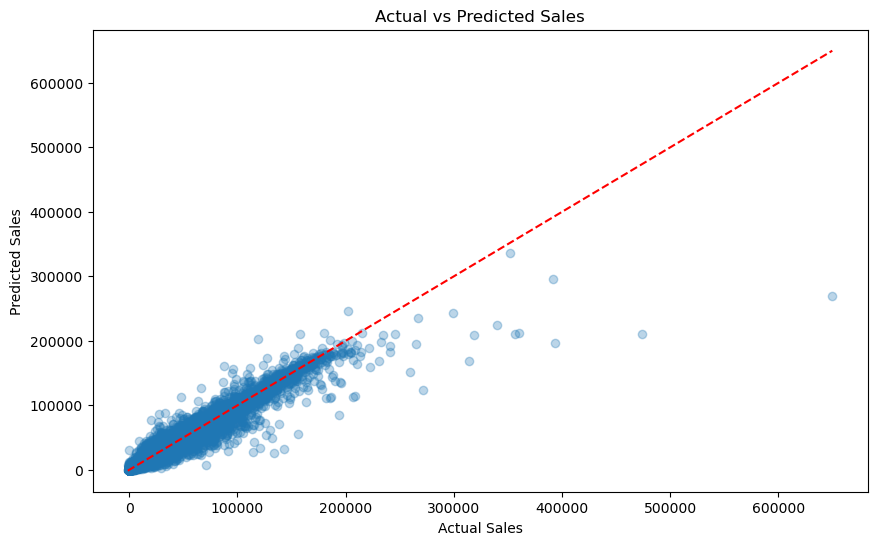

In [9]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

# Plot actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()
